# COVID-19 Global Data Tracker

This project analyzes COVID-19 trends globally, focusing on cases, deaths, and vaccinations in South Africa, the United States, and China.

In [11]:
# Load necessary Python libraries
import pandas as pd          # For data handling
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns        # For advanced visualization
import plotly.express as px  # For interactive map (optional)

# Set visualization style
sns.set(style="darkgrid")


In [12]:
# Load the dataset (make sure the CSV file is in the same folder)
df = pd.read_csv("owid-covid-data.csv")

# Preview first 5 rows of data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [13]:
# Check column names to know what data is available
df.columns

# Check for missing data in each column
df.isnull().sum().sort_values(ascending=False)

# Check data types to see if 'date' needs conversion
df.dtypes


iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [ ]:
# Cleaning the dataset
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries: South Africa, United States, China
countries = ['South Africa', 'United States', 'China']
df_countries = df[df['location'].isin(countries)]

# Keep only necessary columns
df_clean = df_countries[['date', 'location', 'total_cases', 'new_cases',
                         'total_deaths', 'new_deaths', 'total_vaccinations',
                         'people_vaccinated', 'people_fully_vaccinated']]

# Handle missing values
df_clean = df_clean = df_clean.ffill() # Forward-fill missing data
df_clean = df_clean.dropna(subset=['total_cases'])  # Drop rows where total_cases is still missing

# Double-check
df_clean.isnull().sum()


date                         0
location                     0
total_cases                  0
new_cases                    0
total_deaths                 0
new_deaths                   0
total_vaccinations         345
people_vaccinated          522
people_fully_vaccinated    585
dtype: int64

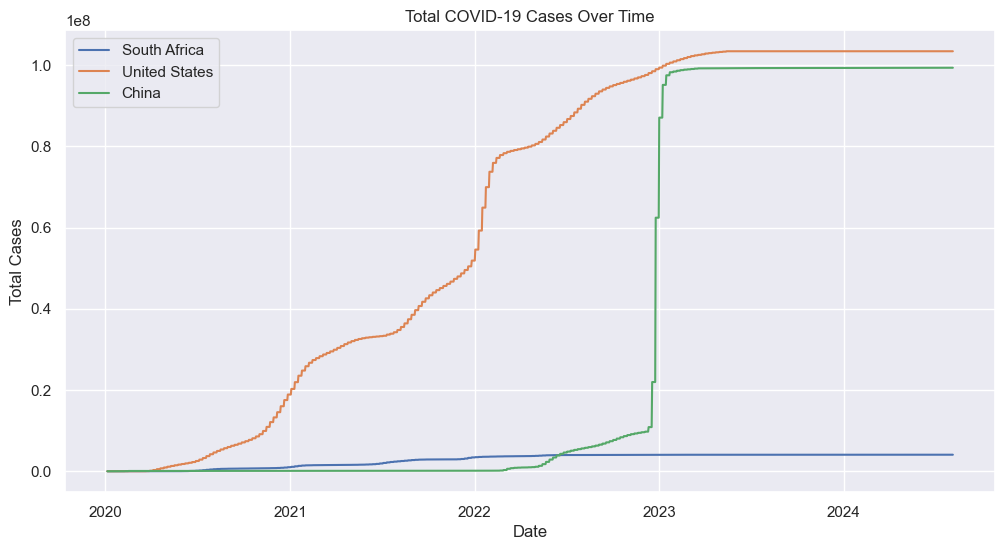

In [15]:
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


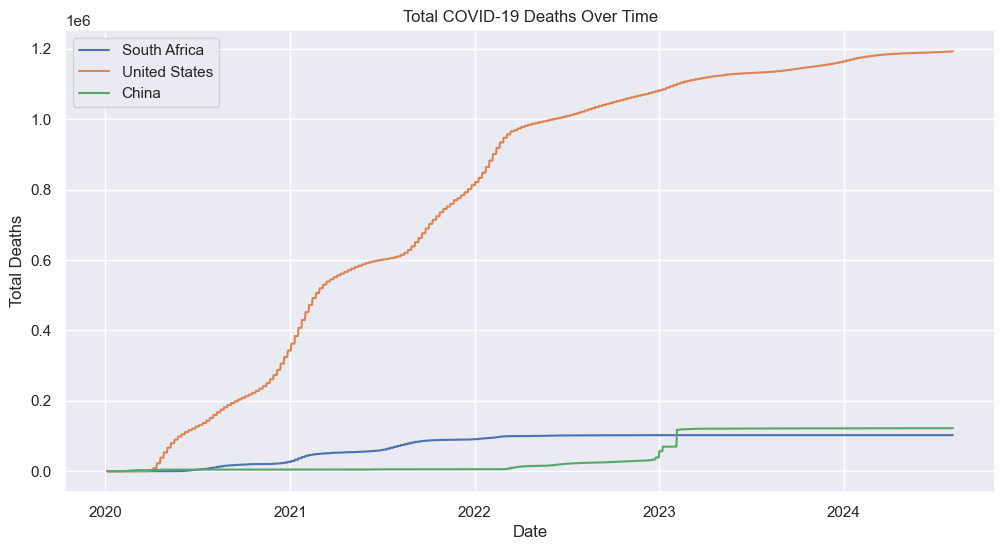

In [16]:
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


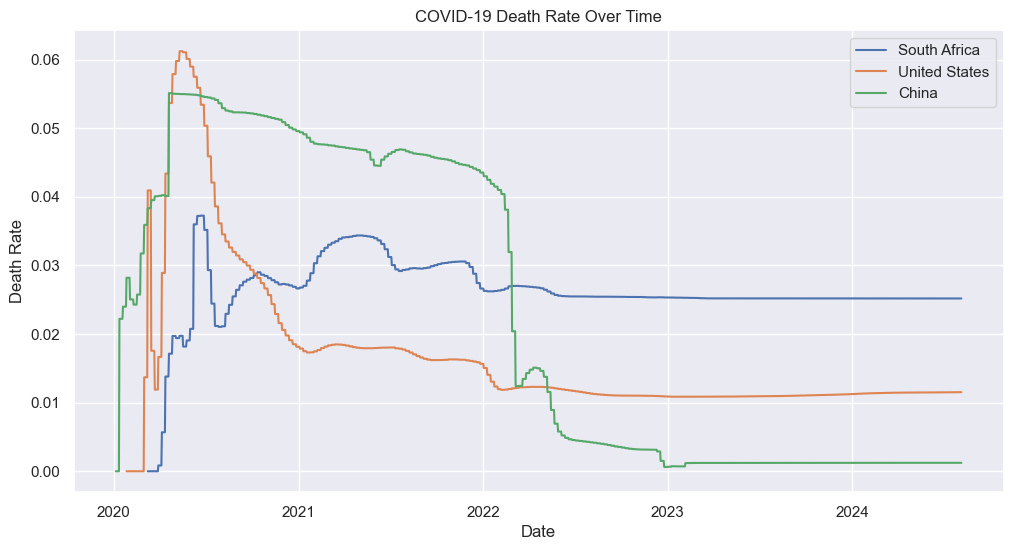

In [17]:
# Add a new column for death rate
df_clean['death_rate'] = df_clean['total_deaths'] / df_clean['total_cases']

# Plot death rate
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.ylabel("Death Rate")
plt.xlabel("Date")
plt.legend()
plt.show()


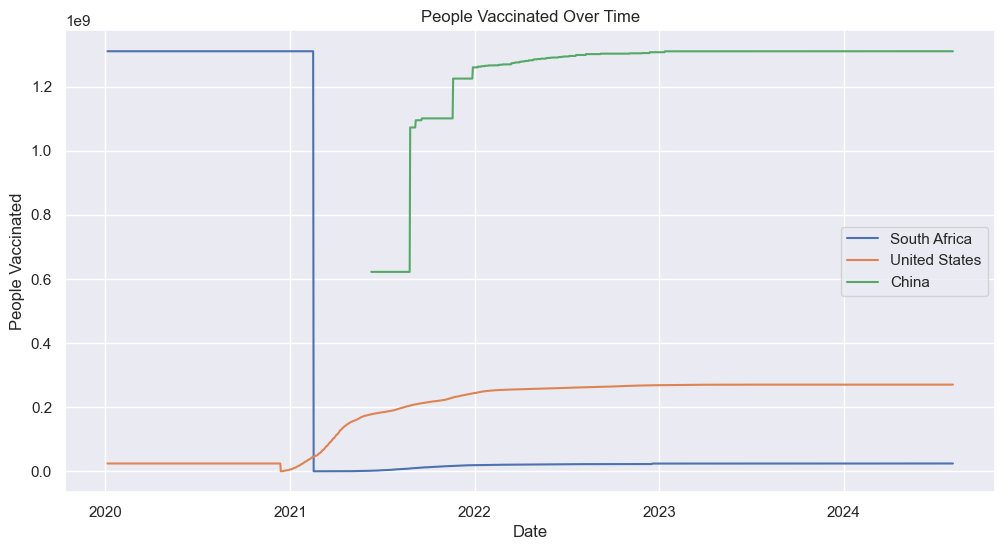

In [18]:
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_clean[df_clean['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated'], label=country)

plt.title("People Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.show()


In [21]:
# Prepare latest data
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

# Drop aggregates (e.g., World, Africa)
latest_data = latest_data[latest_data['iso_code'].str.len() == 3]

fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title=f"Total COVID-19 Cases by Country as of {latest_date.date()}")
fig.show()


### Key Insights

- **The United States** had the highest number of total cases and deaths.
- **South Africa**’s death rate was higher during early waves compared to **China**.
- **China** shows slower case growth, possibly due to strict containment.
- Vaccination progress varied, with the **United States** leading early in rollout.